In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("../data/snopes_gmo_articles_cleaned.csv")

# Define binary label mapping
label_map = {
    'False': 0,
    'Mostly False': 0,
    'Unproven': 0,
    'Outdated': 0,
    'True': 1,
    'Mostly True': 1
}

# Filter dataset and create binary labels
df_filtered = df[df['Rating'].isin(label_map.keys())].copy()
df_filtered['Label'] = df_filtered['Rating'].map(label_map)

# Features and target
X = df_filtered['Claim']
y = df_filtered['Label']

# Build the classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(class_weight='balanced', random_state=42))
])

In [3]:
# Cross-validation predictions
y_pred = cross_val_predict(pipeline, X, y, cv=5)

# Evaluation
print("Classification Report:\n")
print(classification_report(y, y_pred, target_names=["False/Unproven", "True"]))

Classification Report:

                precision    recall  f1-score   support

False/Unproven       0.85      0.98      0.91        42
          True       0.00      0.00      0.00         7

      accuracy                           0.84        49
     macro avg       0.43      0.49      0.46        49
  weighted avg       0.73      0.84      0.78        49



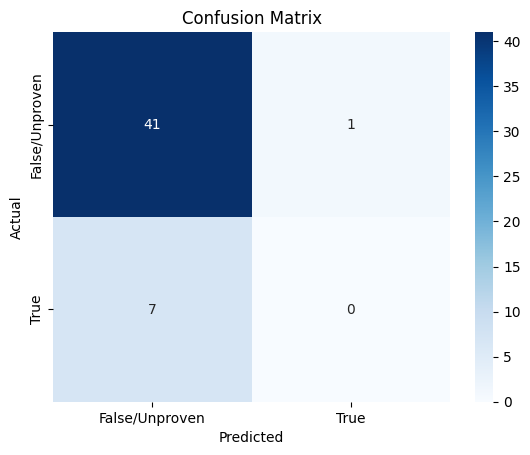

In [4]:
# Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["False/Unproven", "True"], yticklabels=["False/Unproven", "True"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()